<p style="text-align:right;">Mario Stanke, University of Greifswald, Germany</p>

# Solutions to Exercise Set 1, Exercise 4 -  Gradient
In this notebook you will learn to let tensorflow compute a derivative.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Consider the following function in two variables 
$$ y = f(x,a) = x^2 - a\cdot x.$$

Although this particular function is very simple, TensorFlow can compute derivatives even of fairly general python functions (including ```if``` conditions, loops, etc.). 

We will later use this in a context where
 - $f$ is a neural network
 - $x$ is an image (a photo)
 - $a$ are the parameters of the neural network.
 
Indeed, it is useful in different contexts to compute the derivative of the neural network's output with respect to parameters $a$ as well as with respect to the input image $x$.

In [2]:
def f(x, a):
    return x**2 - a * x

x_ = 2. # a specific value for x 
a_ = 2. # a specific value for a
y_ = f(x_, a_) # the output value

Let's first make a plot where we see the values of $y$ near the specific point $(x,a) = (2,2)$:

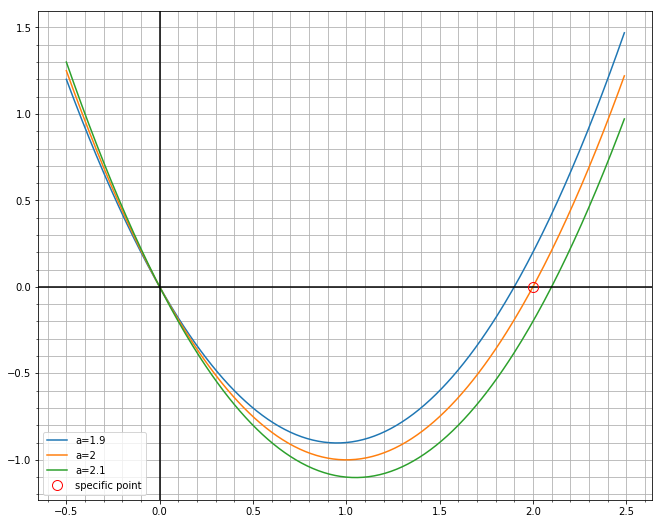

In [3]:
fig, ax = plt.subplots(figsize = (11, 9))
x_range = np.arange(-.5, 2.5, 0.01)

for a in [1.9, 2, 2.1]:
    ax.plot(x_range, f(x_range, a), label = "a="+str(a))
ax.axhline(0, color = "black")
ax.axvline(0, color = "black")
ax.plot(x_, y_, 'ro', markersize = 10, fillstyle = 'none', label = 'specific point')
ax.minorticks_on()
ax.grid(which = 'both')
ax.legend();

## Compute the gradient with respect to $x$ and with respect to $a$
in the <span style="color:red">point $(x, a) = (2, 2)$</span>. More particular, make TensorFlow compute

$$ \frac{\partial f}{\partial x} (2, 2) \qquad \text{ and } \qquad \frac{\partial f}{\partial a} (2, 2).$$
**Tips:**
 - [tf.GradientTape](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/GradientTape)
 - [tf.GradientTape.gradient](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/GradientTape#gradient)

In [5]:
# define tensorflow variables and initialize with given values, these could be tf.constant as well
x = tf.Variable(x_)
a = tf.Variable(a_)

with tf.GradientTape(persistent = True) as tape:
    ### YOUR CODE HERE to compute what should be derived, 1-2 lines
    tape.watch([x, a])
    y = f(x, a)
    ###

# YOUR CODE HERE to define with respect to which variable the gradients should be computed
dy_dx = tape.gradient(y, x).numpy()
dy_da = tape.gradient(y, a).numpy()
# YOUR CODE ENDS

print("dy/dx = ", dy_dx)
print("dy/da = ", dy_da)

dy/dx =  2.0
dy/da =  -2.0


**Solution:**
```
dy/dx =  2.0
dy/da =  -2.0
```

## Analytical solution

$$\begin{align*}
\frac{\partial f}{\partial x} (x, a) &= 2\cdot x - a &&\Rightarrow & \frac{\partial f}{\partial x} (2, 2) &= 2 \\
\frac{\partial y}{\partial a} (x, a) &= -x           &&\Rightarrow & \frac{\partial f}{\partial a} (2, 2) &= -2
\end{align*}
$$

The solution can also approximately be measured from the plot:

<img src="dy_dx.png" width="200px"/>